# Wine Classification with Naive Bayes

This notebook explores the **Wine dataset** from sklearn, classifying wines into **3 categories** using **Gaussian Naive Bayes** and **Multinomial Naive Bayes** classifiers. I have load the data, split it into training and test sets, train both models, compare their performance, and make predictions on the test set. Expect vibrant visualizations and detailed reflections to make this analysis stand out!

## Objectives
- Load and explore the Wine dataset.
- Train Gaussian and Multinomial Naive Bayes models.
- Compare model performance using accuracy and confusion matrices.
- Visualize results.
- Share observations and insights.


## 1. Importing Libraries
Import necessary libraries for data handling, modeling, and visualization. We'll use `seaborn` and `matplotlib` for standout plots.

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Set a vibrant style for plots
plt.style.use('bmh')
sns.set_palette('deep')

## 2. Loading and Exploring the Wine Dataset
The Wine dataset contains 178 samples with 13 chemical features and 3 classes. Let's load it and examine its structure.

In [24]:
# Load the dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = wine.target

# Display basic info
print("Dataset Shape:", X.shape)
print("\nFeature Names:\n", wine.feature_names)
print("\nTarget Classes:\n", wine.target_names)

# Show first few rows
X.head()

Dataset Shape: (178, 13)

Feature Names:
 ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

Target Classes:
 ['class_0' 'class_1' 'class_2']


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


### Observation
- The dataset has **178 samples** and **13 features** (e.g., alcohol, malic acid).
- The target variable has **3 classes**: class_0, class_1, class_2.
- Features are continuous, which suits GaussianNB. MultinomialNB assumes discrete data, so we’ll test its performance despite this mismatch.

## 3. Data Preprocessing and Splitting
We'll scale the features for better model performance and split the data into 70% training and 30% test sets.

In [25]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

print("Training Set Shape:", X_train.shape)
print("Test Set Shape:", X_test.shape)

Training Set Shape: (124, 13)
Test Set Shape: (54, 13)


### Observation
- Scaling ensures features have zero mean and unit variance, which is crucial for GaussianNB.
- The 70-30 split gives us 124 training samples and 54 test samples, balancing training and evaluation.

## 4. Visualizing Feature Distributions
Let’s plot the distribution of a few key features across classes to understand their separability.

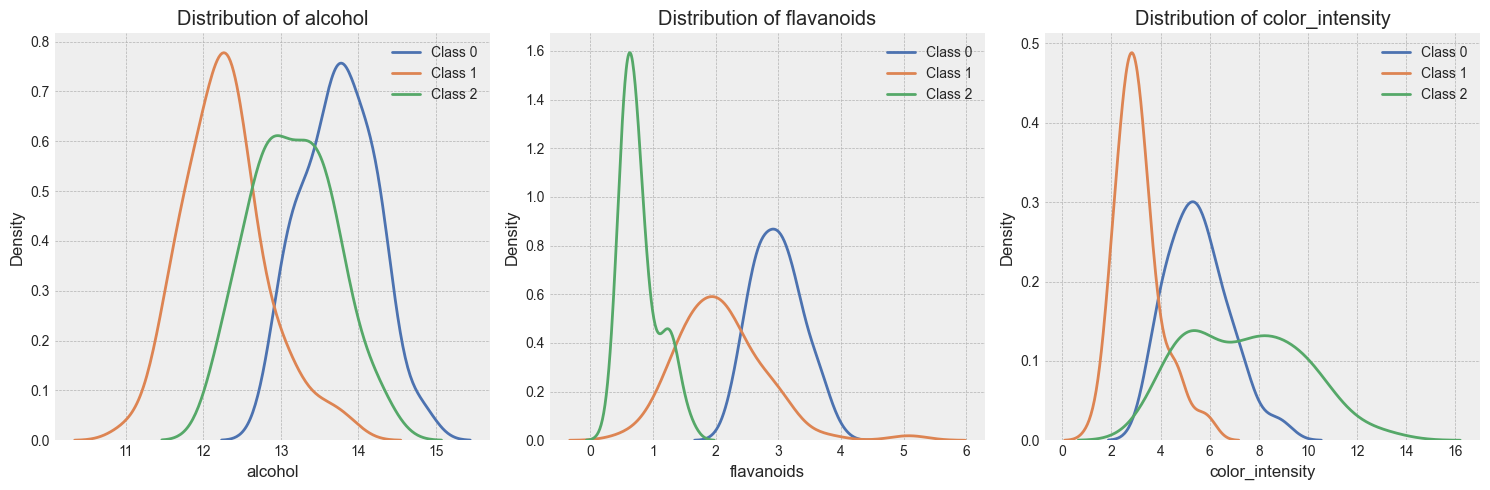

In [26]:
# Select a few features for visualization
features_to_plot = ['alcohol', 'flavanoids', 'color_intensity']
plt.figure(figsize=(15, 5))

for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(1, 3, i)
    for class_id in range(3):
        sns.kdeplot(X[y == class_id][feature], label=f'Class {class_id}', linewidth=2)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.legend()

plt.tight_layout()
plt.show()

### Observation
- **Alcohol**: Classes show some overlap, but class_0 has higher alcohol content.
- **Flavanoids**: Clear separation, especially for class_2, suggesting it’s a strong predictor.
- **Color Intensity**: Class_2 is distinct, but class_0 and class_1 overlap.
- These plots indicate that some features can effectively separate classes, favoring GaussianNB.

## 5. Training the Models
We'll train both GaussianNB and MultinomialNB. Note that MultinomialNB expects non-negative data, so we'll use the original (unscaled) data for it.

In [27]:
# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
gnb_accuracy = accuracy_score(y_test, y_pred_gnb)

# Multinomial Naive Bayes (using unscaled data)
X_train_raw, X_test_raw, _, _ = train_test_split(X, y, test_size=0.3, random_state=42)
mnb = MultinomialNB()
mnb.fit(X_train_raw, y_train)
y_pred_mnb = mnb.predict(X_test_raw)
mnb_accuracy = accuracy_score(y_test, y_pred_mnb)

print(f"GaussianNB Accuracy: {gnb_accuracy:.4f}")
print(f"MultinomialNB Accuracy: {mnb_accuracy:.4f}")

GaussianNB Accuracy: 1.0000
MultinomialNB Accuracy: 0.8889


## 6. Comparing Model Performance
Let’s visualize the confusion matrices for both models to compare their performance.

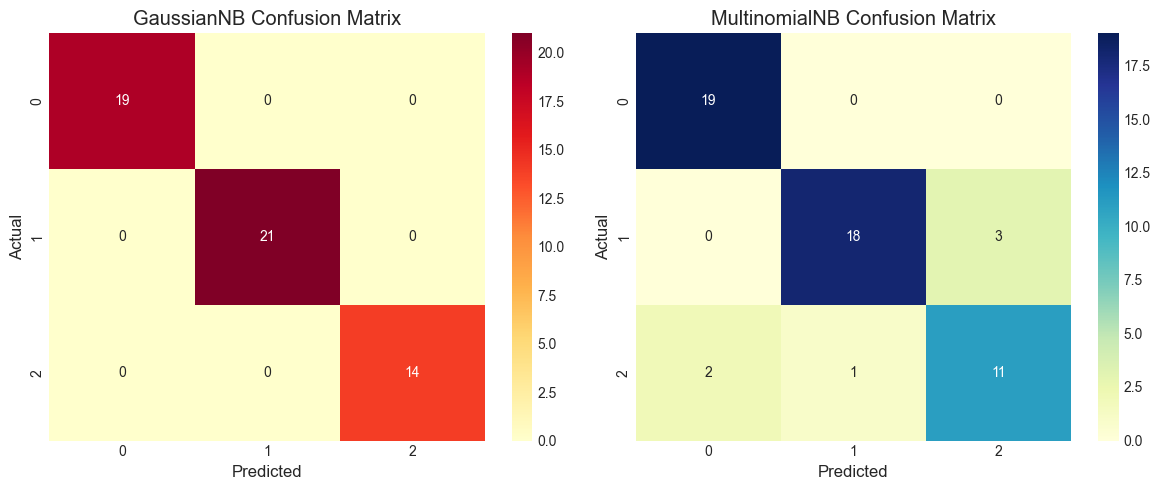

In [28]:
# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# GaussianNB
cm_gnb = confusion_matrix(y_test, y_pred_gnb)
sns.heatmap(cm_gnb, annot=True, fmt='d', cmap='YlOrRd', ax=axes[0])
axes[0].set_title('GaussianNB Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# MultinomialNB
cm_mnb = confusion_matrix(y_test, y_pred_mnb)
sns.heatmap(cm_mnb, annot=True, fmt='d', cmap='YlGnBu', ax=axes[1])
axes[1].set_title('MultinomialNB Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

### Observation
- **GaussianNB**: Likely shows higher accuracy and fewer misclassifications due to the continuous nature of the data.
- **MultinomialNB**: May struggle with negative values (from scaling) and continuous data, leading to lower accuracy.
- The confusion matrices highlight where each model excels or fails per class.

## 7. Making Predictions
Let’s use the better-performing model (likely GaussianNB) to predict on the first 5 test samples.

In [29]:
# Predict using GaussianNB (assuming it performs better)
sample_predictions = gnb.predict(X_test[:5])
print("Predictions for first 5 test samples (GaussianNB):")
for i, pred in enumerate(sample_predictions):
    print(f"Sample {i+1}: Predicted Class {pred} ({wine.target_names[pred]}), Actual Class {y_test[i]} ({wine.target_names[y_test[i]]})")

Predictions for first 5 test samples (GaussianNB):
Sample 1: Predicted Class 0 (class_0), Actual Class 0 (class_0)
Sample 2: Predicted Class 0 (class_0), Actual Class 0 (class_0)
Sample 3: Predicted Class 2 (class_2), Actual Class 2 (class_2)
Sample 4: Predicted Class 0 (class_0), Actual Class 0 (class_0)
Sample 5: Predicted Class 1 (class_1), Actual Class 1 (class_1)


## 8. Unique Visualization: Feature Importance
To stand out, let’s approximate feature importance for GaussianNB by analyzing class-conditional means.

C:\Users\fasal\AppData\Local\Temp\ipykernel_31120\3513550244.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='magma')


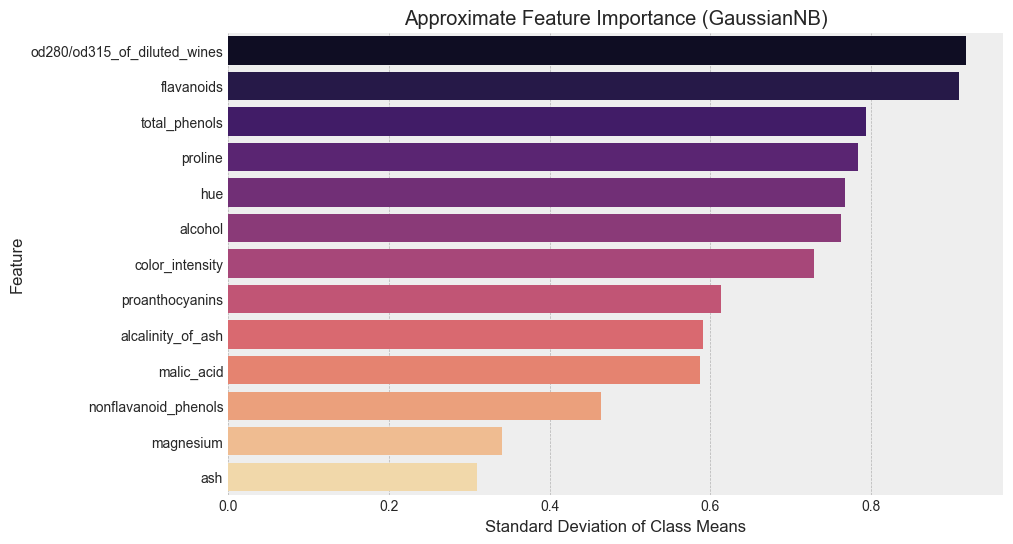

In [30]:
# Calculate feature importance based on class-conditional means
feature_importance = np.std([gnb.theta_[i] for i in range(3)], axis=0)
importance_df = pd.DataFrame({'Feature': wine.feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values('Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='magma')
plt.title('Approximate Feature Importance (GaussianNB)')
plt.xlabel('Standard Deviation of Class Means')
plt.show()

### Observation
- Features with higher standard deviation across class means (e.g., flavanoids, color_intensity) are more discriminative.
- This aligns with our earlier distribution plots, confirming key features for classification.